# 1. Подзагрузка файлов.

В ходе выполнения контрольной работы был использован датасет student_alcohol_data:
https://www.kaggle.com/datasets/mahmoudshogaa/student-alcholoh-data

# 2. Чтение файла.

Посмотрим содержимое в папке /content/:


In [1]:
# импортируем модуль 'os'
import os

# выведем пути к каталогам (dirpath) и имена файлов (filenames)
for dirpath, _, filenames in os.walk('/content/'):

  # проходим по именам файлов
  for filename in filenames:

    # объединяем пути к папкам и вложенным в них файлам
    print(os.path.join(dirpath, filename))

/content/student.csv
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/logs/2024.01.11/17.01.50.905438.log
/content/.config/logs/2024.01.11/17.01.50.107332.log
/content/.config/logs/2024.01.11/17.01.23.878355.log
/content/.config/logs/2024.01.11/17.01.40.683538.log
/content/.config/logs/2024.01.11/17.01.32.816172.log
/content/.config/logs/2024.01.11/17.00.57.357130.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv


Код успешно просматривает все файлы в каталоге "/content/" и его подкаталогах, выводя полные пути к каждому из них. Один из файлов в этом каталоге - "/content/student.csv", представляет собой загруженный файл данных о потреблении алкоголя студентами.

Рассмотрим различные способы предоставления информации о файлах.



In [2]:
# перечислим только видимые файлы и папки
!ls

sample_data  student.csv


In [3]:
# перечислим файлы из папки 'sample_data'
!ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [4]:
# откроем файл
file = open('/content/student.csv', 'r')

# выведем первые 50 символов
print(file.read(50))

# закроем файл
file.close()

,Id,Student_Age,Sex,High_School_Type,Scholarship,A


In [5]:
# откроем файл
file = open('/content/student.csv', 'r')

# создадим итератор строк
for i, line in enumerate(file):

  # выведем строку файла
  print(line.strip())

  # прервем цикл если достигнута 4 строка
  if i == 3:
    break

# закроем файл
file.close()

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA


In [6]:
# импортируем модуль 'pandas'
import pandas as pd

# посмотрим первые три записи файла
file = pd.read_csv('/content/student.csv')
file.head(3)

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA


# 3. Построение модели и прогноз.

Создадим небольшую модель, способную прогнозировать уровень оценки и предоставлять всесторонний анализ потребления алкоголя студентами.

**Шаг 1. Обработка и анализ данных.**

**Исследовательский анализ данных (EDA).**
Выявим взаимосвязь между признаками и целевой переменной.

In [7]:
# воспользуемся методом '.info()' для обобщенного обзора наших данных.
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         145 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

Dataset содержит 145 записей и 16 столбцов.

Проведем визуальный анализ данных.

<Axes: xlabel='High_School_Type', ylabel='count'>

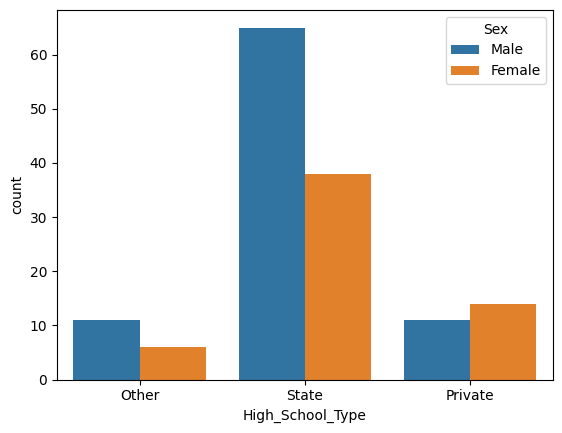

In [8]:
# импортируем модуль 'seaborn'
import seaborn as sns

# посмотрим насколько значимо потребление алкоголя в будний день для итоговой оценки
sns.countplot(x = 'High_School_Type', hue = 'Sex', data = file)

Из результатов выполнения кода видно, что студенты, употребляющие алкоголь в небольших количествах в будние дни, получают более высокие оценки по сравнению с остальными.

<Axes: xlabel='High_School_Type', ylabel='count'>

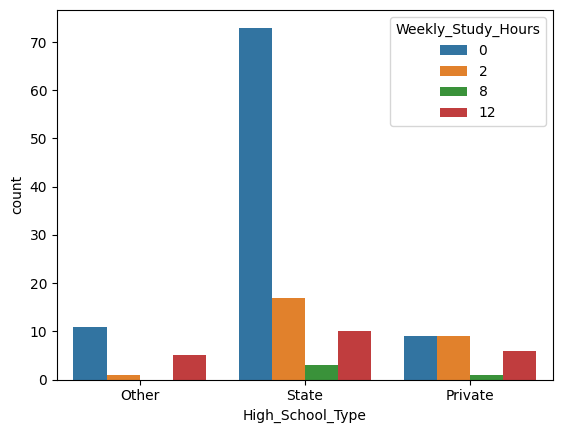

In [9]:
# посмотрим насколько значимо потребление алкоголя в выходные для итоговой оценки
sns.countplot(x = 'High_School_Type', hue = 'Weekly_Study_Hours', data = file)

При этом замечено, что влияние употребления алкоголя в выходные дни минимально для всех студентов.

**Пропущенные значения.**

In [10]:
# выявим пропущенные значения и посчитаем их количество
file.isnull().sum()

Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

В результате выполнения кода не обнаружено пропущенных значений.

**Категориальные переменные.**


In [11]:
# преобразуем категориальные переменные в индикаторные переменные, применяя кодировку one-hot
sex = pd.get_dummies(file['Sex'], drop_first=True, prefix='Sex')
additionalWork = pd.get_dummies(file['Additional_Work'], drop_first=True, prefix='Additional_Work')
sportsActivity = pd.get_dummies(file['Sports_activity'], drop_first=True, prefix='Sports_activity')
attendance = pd.get_dummies(file['Attendance'], drop_first=True, prefix='Attendance')
reading = pd.get_dummies(file['Reading'], drop_first=True, prefix='Reading')
notes = pd.get_dummies(file['Notes'], drop_first=True, prefix='Notes').iloc[:, 1:]
listeningInClass = pd.get_dummies(file['Listening_in_Class'], prefix='Listening_in_Class').iloc[:, 2:]
projectWork = pd.get_dummies(file['Project_work'], drop_first=True, prefix='Project_work')
grade = pd.get_dummies(file['Grade'], prefix='Grade')

# удалим исходные переменные до применения кодировки one-hot
file.drop(['Unnamed: 0', 'Sex', 'High_School_Type', 'Scholarship',
           'Additional_Work', 'Sports_activity', 'Transportation',
           'Attendance','Reading', 'Notes','Listening_in_Class',
           'Project_work','Grade'], axis = 1, inplace = True)

# присоединим переменные к исходному датафрейму 'file'
file = pd.concat([file, sex, additionalWork, sportsActivity, attendance,
                  reading, notes, listeningInClass, projectWork,
                  grade], axis = 1)

# переименуем новые переменные
file.rename(columns={'Sex_Male': 'Sex'}, inplace=True)
file.rename(columns={'Additional_Work_Yes': 'Additional_Work'}, inplace=True)
file.rename(columns={'Sports_activity_Yes': 'Sports_activity'}, inplace=True)
file.rename(columns={'Reading_Yes': 'Reading'}, inplace=True)
file.rename(columns={'Notes_Yes': 'Notes'}, inplace=True)
file.rename(columns={'Listening_in_Class_Yes': 'Listening_in_Class'}, inplace=True)
file.rename(columns={'Project_work_Yes': 'Project_work'}, inplace=True)

# выведем первые три строки таблицы
file.head(3)

,Id,Student_Age,Weekly_Study_Hours,Sex,Additional_Work,Sports_activity,Attendance_Always,Attendance_Never,Attendance_Sometimes,Reading,...,Listening_in_Class,Project_work,Grade_AA,Grade_BA,Grade_BB,Grade_CB,Grade_CC,Grade_DC,Grade_DD,Grade_Fail
0,5001,21,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5002,20,0,1,1,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,0
2,5003,21,2,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0


**Нормализация данных.**

In [12]:
# импортируем класс 'StandardScaler'
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# масштабируем и рассчитаем среднее арифмитическое и СКО
file[['Weekly_Study_Hours', 'Attendance_Always', 'Attendance_Never', 'Attendance_Sometimes']] = \
scaler.fit_transform(file[['Weekly_Study_Hours', 'Attendance_Always', 'Attendance_Never', 'Attendance_Sometimes']])

file[['Reading', 'Notes', 'Listening_in_Class', 'Project_work']] = \
scaler.fit_transform(file[['Reading', 'Notes', 'Listening_in_Class', 'Project_work']])

# посмотрим результат
print(file[['Weekly_Study_Hours', 'Attendance_Always', 'Attendance_Never', 'Attendance_Sometimes']])

     Weekly_Study_Hours  Attendance_Always  Attendance_Never  \
0             -0.550474           0.692526         -0.411527   
1             -0.550474           0.692526         -0.411527   
2             -0.078174          -1.443990          2.429972   
3             -0.078174           0.692526         -0.411527   
4              2.283327           0.692526         -0.411527   
..                  ...                ...               ...   
140           -0.550474           0.692526         -0.411527   
141           -0.550474          -1.443990          2.429972   
142           -0.550474           0.692526         -0.411527   
143            2.283327          -1.443990         -0.411527   
144            2.283327           0.692526         -0.411527   

     Attendance_Sometimes  
0               -0.456435  
1               -0.456435  
2               -0.456435  
3               -0.456435  
4               -0.456435  
..                    ...  
140             -0.456435  
141    

**Шаг 2. Разделение обучающей выборки на признаки и целевую.**

In [13]:
# импортируем модуль 'train_test_split'
from sklearn.model_selection import train_test_split

# разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(file.drop(columns=['Grade_BA']), file['Grade_BA'], train_size=0.8)

**Шаг 3. Обучение модели логической регрессии**

In [14]:
# импортируем логистическую регрессию 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса
model = LogisticRegression(max_iter=100000)

# обучим модель
model.fit(X_train, y_train)

# сделаем предсказание класса
y_pred_file = model.predict(X_train)

In [15]:
# импортируем матрицу ошибок 'confusion_matrix'
from sklearn.metrics import confusion_matrix

# передадим фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_file)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,97,0
1,8,11


In [16]:
# импортируем метрику 'accuracy_score'
from sklearn.metrics import accuracy_score

# передадим фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_file)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.931

На обучающей выборке модель показала результат в 94%.

**Шаг 4. Построение прогноза на тестовых данных**

In [17]:
# импортируем логистическую регрессию 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса
model = LogisticRegression(max_iter=10000)

# обучим модель
model.fit(X_test, y_test)

# сделаем предсказание класса
y_pred_file = model.predict(X_test)

In [18]:
# импортируем матрицу ошибок 'confusion_matrix'
from sklearn.metrics import confusion_matrix

# передадим фактические и прогнозные значения
conf_matrix = confusion_matrix(y_test, y_pred_file)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,24,0
1,2,3


In [19]:
# импортируем метрику 'accuracy_score'
from sklearn.metrics import accuracy_score

# передадим фактические и прогнозные значения
model_accuracy = accuracy_score(y_test, y_pred_file)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.931

На тестовой выборке модель показала результат в 86,2%.

# 4. Сохранение результата в новом файле на сервере

In [20]:
# передадим индекс студентов
ids = X_test['Id']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - id студента,
# вторая - прогноз
result_file = pd.DataFrame({'Id' : ids, 'Grade_BA' : y_pred_file})

# посмотрим результат
result_file.head()

,Id,Grade_BA
64,5065,0
73,5074,0
9,5010,0
70,5071,0
52,5053,0


In [21]:
# создадим новый файл result.csv, удалив индекс
result_file.to_csv('result.csv', index = False)

print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!
